Visualize embedding of instructions learned by text encoders
Ganesh 11/08/2023

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

In [117]:
# get parameters
model_name = "One-hot"
trained = False
training = "AFTER" if trained else "BEFORE"
save_fig_dir = "./figures/"
train_embd_dir = "./embeddings/one_hot_train.pkl"
test_embd_dir = "./embeddings/one_hot_test.pkl"
figsize = (6,4)

In [118]:
# import instructions & embeddings

def get_inst_emb(file_dir):
    with open(file_dir, 'rb') as f:
        x = pickle.load(f)
    return list(x.keys()), np.array([x[i] for i in x.keys()])


train_instructions, train_embeddings = get_inst_emb(train_embd_dir)
test_instructions, test_embeddings = get_inst_emb(test_embd_dir)

print(train_instructions)
print(train_embeddings.shape)
print(test_instructions)
print(test_embeddings.shape)


['red cube', 'red cylinder', 'red prism', 'red sphere', 'green capsule', 'green cylinder', 'green prism', 'green sphere', 'blue capsule', 'blue cube', 'blue prism', 'blue sphere', 'yellow capsule', 'yellow cube', 'yellow cylinder', 'yellow sphere', 'black capsule', 'black cube', 'black cylinder', 'black prism']
(20, 128)
['red capsule', 'green cube', 'blue cylinder', 'yellow prism', 'black sphere']
(5, 128)


In [119]:
# get word embedding using PCA

pca = PCA(n_components=0.95)  # get N components to get 95% variance

# fit the principal components using only the train embeddings & transform them
train_emb = pca.fit_transform(train_embeddings)

# get number of components & variance explained by each
print(train_emb.shape)
print(np.round(pca.explained_variance_ratio_,3))

# transform the test embeddings using the components learned using train embeddings
test_emb = pca.transform(test_embeddings)
print(test_emb.shape)

pca_var_file = f"{save_fig_dir}{model_name}_{training}_PCA.txt"
with open(pca_var_file, 'w') as file:
    file.write(str(pca.explained_variance_ratio_))


(20, 8)
[0.378 0.139 0.117 0.106 0.092 0.064 0.053 0.051]
(5, 8)


In [120]:
# get color map
# N = len(train_emb)
# def get_cmap(n, name='hsv'):
#     '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
#     RGB color; the keyword argument name must be a standard mpl colormap name.'''
#     return plt.cm.get_cmap(name, n)

# cmap = get_cmap(N)

name_rules = {
    "cube": "o",
    "sphere": "s",
    "capsule": "P",
    "cylinder": "d",
    "prism": '^'
    # Add more rules as needed
}

def get_colormap_symbolmap(instructions):
    colormap = []
    shapemap = []
    for inst in instructions:
        color = inst.split(' ')[0]
        shape = inst.split(' ')[1]
        colormap.append(color)
        shapemap.append(shape)
    symbolmap = [name_rules[name] if name in name_rules else name for name in shapemap]
    return colormap,symbolmap

train_colormap, train_symbolmap = get_colormap_symbolmap(train_instructions)
test_colormap,test_symbolmap = get_colormap_symbolmap(test_instructions)
print(test_symbolmap)



['P', 'o', 'd', '^', 's']


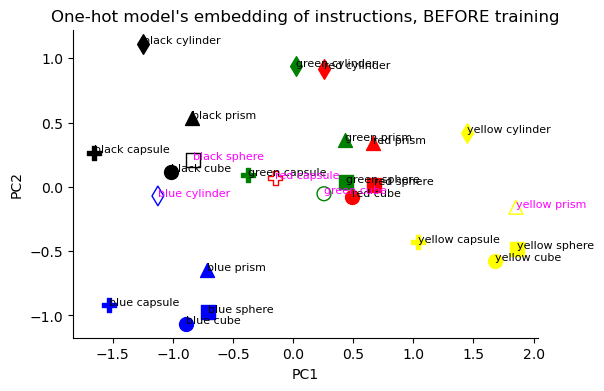

In [121]:
# plot train embeddings using colormap

f = plt.figure(figsize=figsize)
plt.title(f"{model_name} model's embedding of instructions, {training} training")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().spines[['right', 'top']].set_visible(False)

for c, inst, emb in zip(np.arange(len(train_instructions)), train_instructions, train_emb):
    x1 = emb[0]
    x2 = emb[1]
    plt.scatter(x1, x2, marker=train_symbolmap[c], color=train_colormap[c],s=100)
    plt.text(x1,x2,s=inst, fontsize=8)

# plot test embeddings using colormap
for c, inst, emb in zip(np.arange(len(test_instructions)), test_instructions, test_emb):
    x1 = emb[0]
    x2 = emb[1]
    plt.scatter(x1, x2, marker=test_symbolmap[c], color=test_colormap[c], facecolors="none", s=100)
    plt.text(x1,x2,s=inst, fontsize=8, color="magenta")
plt.show()
f.savefig(f"{save_fig_dir}{model_name}_{training}_2D.png")


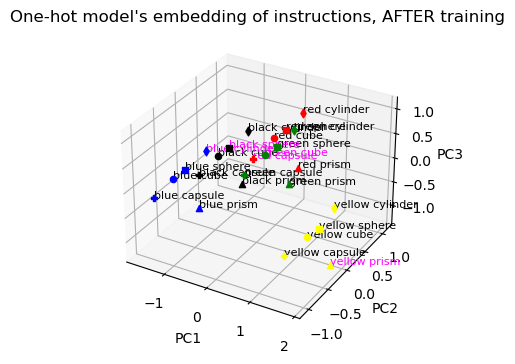

In [122]:
# plot 3D plots to cover 1 more axis
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

ax.set_title(f"{model_name} model's embedding of instructions, AFTER training")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.spines[['right', 'top']].set_visible(False)

for c, inst, emb in zip(np.arange(len(train_instructions)), train_instructions, train_emb):
    x1 = emb[0]
    x2 = emb[1]
    x3 = emb[2]
    ax.scatter(x1, x2,x3, marker=train_symbolmap[c], color=train_colormap[c])
    ax.text(x1,x2,x3, s=inst, fontsize=8)

# plot test embeddings using colormap
for c, inst, emb in zip(np.arange(len(test_instructions)), test_instructions, test_emb):
    x1 = emb[0]
    x2 = emb[1]
    x3 = emb[2]
    ax.scatter(x1, x2,x3, marker=test_symbolmap[c], color=test_colormap[c])
    ax.text(x1,x2,x3, s=inst, fontsize=8, color="magenta")

#ax.view_init(elev=40, azim=30)
plt.show()
fig.savefig(f"{save_fig_dir}{model_name}_{training}_3D.png")